In [1]:
from EMNIST import x_train, y_train, x_test, y_test
from sklearn.linear_model import LogisticRegression
from random import randint
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
clf_lgr = LogisticRegression()

In [3]:
x_train_lgr = list(x_train)
y_train_lgr = y_train
x_test_lgr = list(x_test)
y_test_lgr = y_test

In [ ]:
clf_lgr.fit(x_train_lgr, y_train_lgr)

In [ ]:
predicted_lgr = clf_lgr.predict(x_test_lgr)
expected_lgr = y_test_lgr

In [12]:
x_test_lgr = np.array(x_test_lgr)

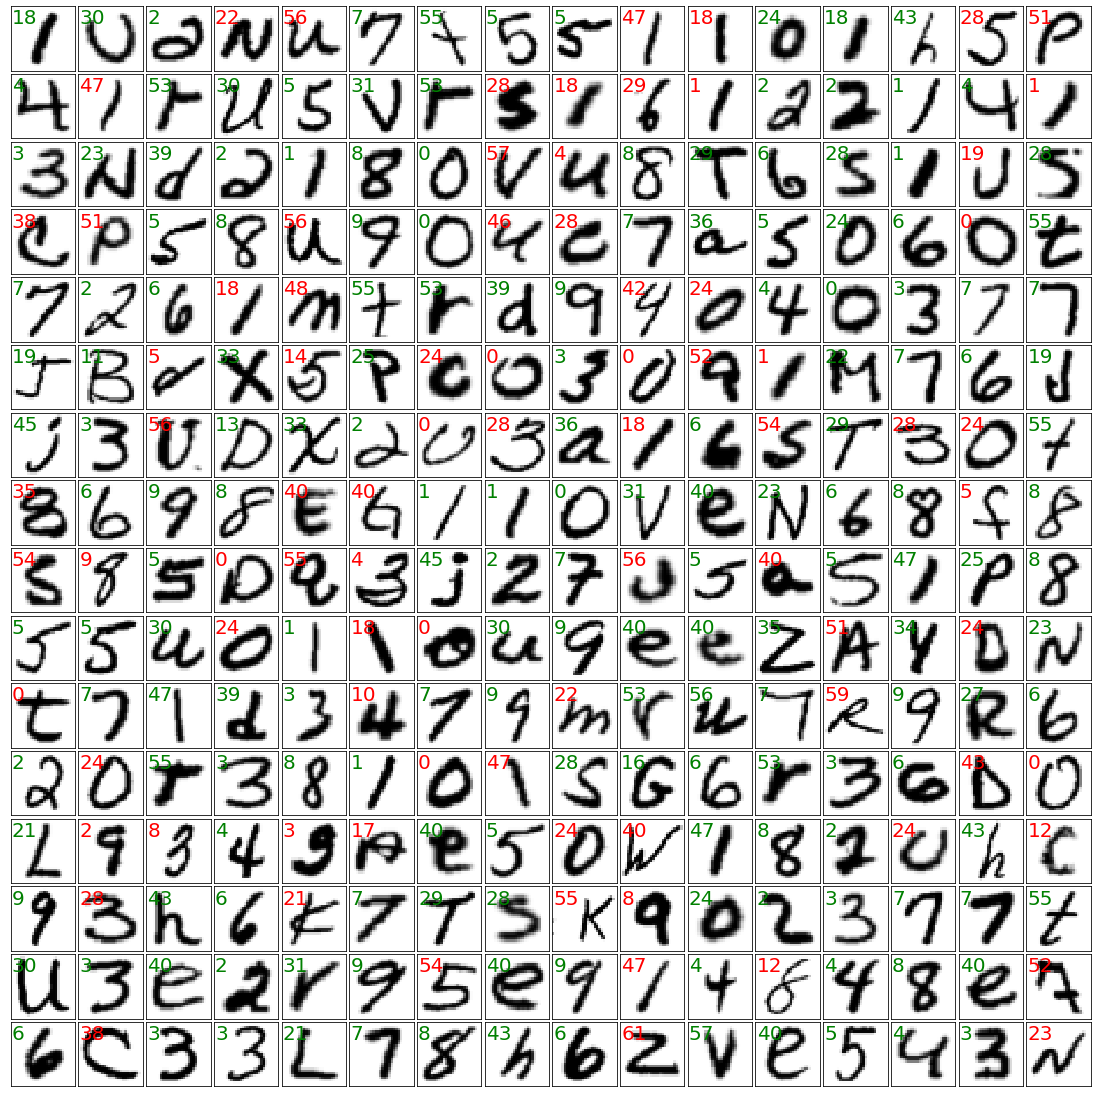

In [16]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_lgr) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_lgr.reshape(-1, 28, 28)[i], cmap=plt.cm.binary, interpolation='nearest')
    if predicted_lgr[i] == expected_lgr[i]:
        ax.text(0, 7, str(predicted_lgr[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_lgr[i]), fontsize=20, color='red')
ax.axis("on")
fig.savefig('DTC EMNIST DESBALANCEADO.png', dpi=fig.dpi, edgecolor="purple")

In [14]:
print(metrics.classification_report(expected_lgr, predicted_lgr))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      5778
           1       0.64      0.63      0.64      6330
           2       0.83      0.82      0.82      5869
           3       0.88      0.86      0.87      5969
           4       0.83      0.82      0.83      5619
           5       0.74      0.73      0.73      5190
           6       0.87      0.87      0.87      5705
           7       0.91      0.92      0.92      6139
           8       0.81      0.79      0.80      5633
           9       0.85      0.83      0.84      5686
          10       0.62      0.60      0.61      1062
          11       0.41      0.37      0.39       648
          12       0.63      0.61      0.62      1739
          13       0.49      0.43      0.46       779
          14       0.59      0.57      0.58       851
          15       0.56      0.55      0.56      1440
          16       0.48      0.46      0.47       447
          17       0.51    

In [15]:
metrics.confusion_matrix(expected_lgr, predicted_lgr)

array([[3391,    1,   14, ...,    0,    0,    4],
       [   2, 3997,    8, ...,    1,    2,    0],
       [  21,   16, 4791, ...,   11,    2,  148],
       ...,
       [   0,    3,   12, ...,  173,    2,    8],
       [   1,    3,    1, ...,    4,   88,    0],
       [   1,    1,  124, ...,    8,    0,  135]], dtype=int64)